In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import json

In [2]:
stuff_classes=[
"Bird", # need not be considered
"Ground Animal", # need not be considered
"Curb",
"Fence",
"Guard Rail",
"Barrier",
"Wall",
"Bike Lane",
"Crosswalk - Plain",
"Curb Cut", # need not be considered
"Parking",
"Pedestrian Area",
"Rail Track",# need not be considered
"Road",
"Service Lane",# need not be considered
"Sidewalk",
"Bridge",# need not be considered
"Building",# need not be considered
"Tunnel",# need not be considered
"Person",
"Bicyclist",
"Motorcyclist",
"Other Rider",
"Lane Marking - Crosswalk",
"Lane Marking - General",
"Mountain",# need not be considered
"Sand",# need not be considered
"Sky",# need not be considered
"Snow",# need not be considered
"Terrain",# need not be considered
"Vegetation",
"Water",# need not be considered
"Banner",
"Bench",
"Bike Rack",
"Billboard",# need not be considered
"Catch Basin",# need not be considered
"CCTV Camera",# need not be considered
"Fire Hydrant",
"Junction Box",
"Mailbox",
"Manhole",
"Phone Booth",
"Pothole",
"Street Light",
"Pole",
"Traffic Sign Frame",
"Utility Pole",
"Traffic Light",
"Traffic Sign (Back)",
"Traffic Sign (Front)",
"Trash Can",
"Bicycle",
"Boat",
"Bus",
"Car",
"Caravan",
"Motorcycle",
"On Rails",# need not be considered
"Other Vehicle",
"Trailer",
"Truck",
"Wheeled Slow",# need not be considered
"Car Mount",# need not be considered
"Ego Vehicle",
"Stop Positions"
]


#### testing

In [226]:
clip_no = 'clip_74'
df = pd.read_csv(f'/Volumes/Untitled/titan_data/dataset/titan_0_4/{clip_no}.csv')
df.head()

frames              label  obj_track_id  top  left  height  width  \
0  000006.png             person           0.0  611  2430     678    157   
1  000006.png             person           1.0  756  1230     102     22   
2  000006.png  vehicle_2_wheeled           2.0  816   169     168    285   
3  000006.png  vehicle_4_wheeled           3.0  720   500     200    465   
4  000006.png  vehicle_2_wheeled           4.0  791  2280     167    235   

  attributes.Trunk Open attributes.Motion Status attributes.Doors Open  \
0                   NaN                      NaN                   NaN   
1                   NaN                      NaN                   NaN   
2                   NaN                   parked                   NaN   
3                closed                   parked                closed   
4                   NaN                   parked                   NaN   

  attributes.Communicative attributes.Complex Contextual  \
0        none of the above             none of the above   
1        none of the above             none of the above   
2                      NaN                           NaN   
3                      NaN                           NaN   
4                      NaN                           NaN   

  attributes.Atomic Actions attributes.Simple Context  \
0                  standing         none of the above   
1                   walking       walking on the road   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

    attributes.Transporting attributes.Age  
0         none of the above          adult  
1  carrying with both hands          adult  
2                       NaN            NaN  
3                       NaN            NaN  
4                       NaN            NaN

In [228]:
position_ranking_no = '000504'
titan_person_id = 12
temp = df.loc[(df['frames']==f'{position_ranking_no}.png') & (df['label']=='person') & (df['obj_track_id']==titan_person_id)]
t = int(temp['top'].iloc[0])
l = int(temp['left'].iloc[0])
h = int(temp['height'].iloc[0])
w = int(temp['width'].iloc[0])
print(t,l,h,w)

619 2415 791 289


In [229]:
temp

frames   label  obj_track_id  top  left  height  width  \
511  000504.png  person          12.0  619  2415     791    289   

    attributes.Trunk Open attributes.Motion Status attributes.Doors Open  \
511                   NaN                      NaN                   NaN   

    attributes.Communicative attributes.Complex Contextual  \
511        none of the above             none of the above   

    attributes.Atomic Actions attributes.Simple Context  \
511         none of the above                    biking   

    attributes.Transporting attributes.Age  
511       none of the above          adult

In [230]:
mask = np.zeros_like(img)
mask[t:t+h,l:l+w] = 1

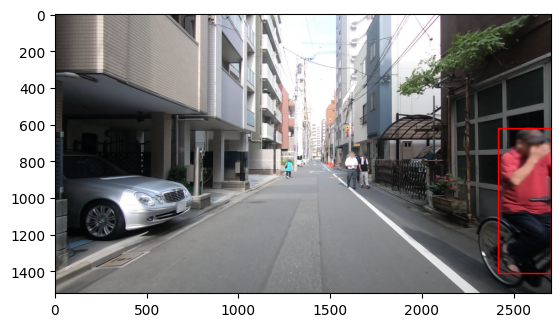

In [233]:

img = cv2.imread(f'/Volumes/Untitled/titan_data/dataset/images_anonymized/{clip_no}/images/{position_ranking_no}.png')
fig, ax = plt.subplots(1) 
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
mask = np.zeros_like(img)
mask[t:t+h,l:l+w] = 1
rect = patches.Rectangle(xy=(l,t),height=h,width=w,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [215]:
segments_info[25]

{'id': 52, 'isthing': True, 'category_id': 52}

In [235]:
len(segments_info)

37

In [234]:
image_mask = np.load(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_updated.npy')
with open(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_segments_updated.json', 'r') as f:
    segments_info = json.load(f)
people = []
for segment in segments_info:
    binary_mask = np.where(image_mask == segment["id"], 1, 0)
    if np.max(binary_mask) == 0:
        continue
    else:
        # if segment['category_id']==19:
        people.append({'id':segment['id'],'mask':image_mask==segment['id']})
people

[{'id': 2,
  'mask': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
        shape=(1520, 2704))},
 {'id': 3,
  'mask': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
        shape=(1520, 2704))},
 {'id': 4,
  'mask': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False

In [211]:
people[25]

{'id': 52,
 'mask': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
       shape=(1520, 2704))}

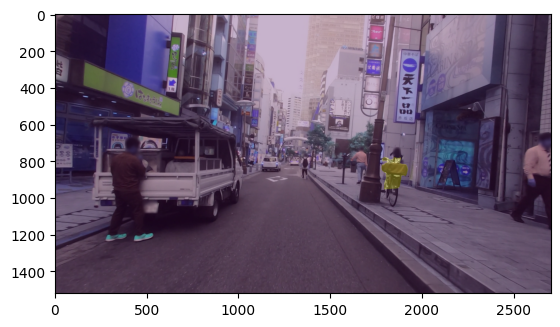

In [212]:
plt.imshow(img)
plt.imshow(people[25]['mask'],alpha=0.3,)
plt.show()

#### actual run

In [139]:
combined_df = pd.read_csv('combined_data_expanded_cleaned.csv')
combined_df.head()

Input.clip_address  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

                    Input.image_address_bounding_box  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

                                 Input.image_address  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

  Input.image_address_standardized                        Input.action  \
0       clip_355/images/000594.png  walking along the side of the road   
1        clip_65/images/000534.png                 walking on the road   
2       clip_355/images/000594.png  walking along the side of the road   
3       clip_355/images/000594.png  walking along the side of the road   
4       clip_628/images/000366.png                 walking on the road   

                              Input.next_action  \
0                     stop and wave down a taxi   
1             call the taxi driver to come fast   
2  slow down and read the signs in front of her   
3                                enter the shop   
4           meet a woman crossing a gravel road   

    Answer.annotatedResult.labeledImage.pngImageData  \
0  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
1  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
2  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
3  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
4  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   

                                  Answer.annotations position_ranking_by_id  \
0  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
1  Position 3,Position 4,Position 5,Position 6,Po...      35,36,37,38,33,34   
2  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
3  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
4  Position 3,Position 4,Position 5,Position 6,Po...      65,66,67,68,63,64   

            Scene_graph_JSON Titan Clip ID  Titan Person ID  \
0  seen/clip_355_000594.json      clip_355                9   
1   seen/clip_65_000534.json       clip_65                0   
2  seen/clip_355_000594.json      clip_355                9   
3  seen/clip_355_000594.json      clip_355                9   
4  seen/clip_628_000366.json      clip_628               26   

  ranking_not_in_scene_graph  
0                         []  
1                         []  
2                         []  
3                         []  
4                         []

In [239]:
def iou_mapping(row):
# for id,row in combined_df.iterrows():
    clip_no,_,position_ranking_no = row['Input.image_address_standardized'].split('/')
    position_ranking_no = position_ranking_no.split('.')[0]
    titan_person_id = row['Titan Person ID']
    # print(clip_no,position_ranking_no,titan_person_id)
    with open('clip_number_to_batch.pkl', 'rb') as f:
        data_dict = pickle.load(f)
    batch_no = data_dict[clip_no][position_ranking_no][0]

    image_mask = np.load(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_updated.npy')
    with open(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_segments_updated.json', 'r') as f:
        segments_info = json.load(f)
    objects = []
    for segment in segments_info:
        binary_mask = np.where(image_mask == segment["id"], 1, 0)
        if np.max(binary_mask) == 0:
            continue
        else:
            if segment['category_id'] in [19,20,21,22,52,57]:
                objects.append({'id':segment['id'],'mask':image_mask==segment['id'],'category':stuff_classes[segment["category_id"]]})

    df = pd.read_csv(f'/Volumes/Untitled/titan_data/dataset/titan_0_4/{clip_no}.csv')
    temp = df.loc[(df['frames']==f'{position_ranking_no}.png') & (df['label']=='person') & (df['obj_track_id']==titan_person_id)]
    t = int(temp['top'].iloc[0])
    l = int(temp['left'].iloc[0])
    h = int(temp['height'].iloc[0])
    w = int(temp['width'].iloc[0])
    rect_mask = np.zeros_like(people[0]['mask'])
    rect_mask[t:t+h,l:l+w] = 1
    max_id = -1
    max_iou = -1
    max_category=''
    for obj in objects:
        iou = np.sum(rect_mask & obj['mask'])/np.sum(rect_mask | obj['mask'])
        if iou>max_iou:
            max_iou=iou
            max_id = obj['id']
            max_category=obj['category']
    return max_id,max_iou,max_category
    # if max_category not in ['Bicycle','Person']:
        # print(clip_no,position_ranking_no,titan_person_id)
        # print(max_id,max_iou,max_category)

In [246]:
temp_df = combined_df.apply(iou_mapping,axis=1,result_type='expand')

In [250]:
temp_df[2].unique()

array(['Bicycle', 'Person', 'Bicyclist', 'Motorcyclist', 'Motorcycle'],
      dtype=object)

In [255]:
temp_df[0]

0       52
1        2
2       52
3       52
4       35
        ..
7641    32
7642    42
7643     1
7644     2
7645     2
Name: 0, Length: 7646, dtype: int64

In [256]:
combined_df['person_panoptic_id'] = temp_df[0]
combined_df['person panoptic-titan iou'] = temp_df[1]
combined_df['person_panoptic_category'] = temp_df[2]

In [257]:
combined_df.head()

Input.clip_address  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

                    Input.image_address_bounding_box  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

                                 Input.image_address  \
0  https://stop-position-ranker.s3.ap-northeast-1...   
1  https://stop-position-ranker.s3.ap-northeast-1...   
2  https://stop-position-ranker.s3.ap-northeast-1...   
3  https://stop-position-ranker.s3.ap-northeast-1...   
4  https://stop-position-ranker.s3.ap-northeast-1...   

  Input.image_address_standardized                        Input.action  \
0       clip_355/images/000594.png  walking along the side of the road   
1        clip_65/images/000534.png                 walking on the road   
2       clip_355/images/000594.png  walking along the side of the road   
3       clip_355/images/000594.png  walking along the side of the road   
4       clip_628/images/000366.png                 walking on the road   

                              Input.next_action  \
0                     stop and wave down a taxi   
1             call the taxi driver to come fast   
2  slow down and read the signs in front of her   
3                                enter the shop   
4           meet a woman crossing a gravel road   

    Answer.annotatedResult.labeledImage.pngImageData  \
0  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
1  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
2  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
3  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   
4  iVBORw0KGgoAAAANSUhEUgAACpAAAAXwAQMAAABl6wiCAA...   

                                  Answer.annotations position_ranking_by_id  \
0  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
1  Position 3,Position 4,Position 5,Position 6,Po...      35,36,37,38,33,34   
2  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
3  Position 3,Position 4,Position 5,Position 6,Po...      64,65,66,67,62,63   
4  Position 3,Position 4,Position 5,Position 6,Po...      65,66,67,68,63,64   

            Scene_graph_JSON Titan Clip ID  Titan Person ID  \
0  seen/clip_355_000594.json      clip_355                9   
1   seen/clip_65_000534.json       clip_65                0   
2  seen/clip_355_000594.json      clip_355                9   
3  seen/clip_355_000594.json      clip_355                9   
4  seen/clip_628_000366.json      clip_628               26   

  ranking_not_in_scene_graph  person_panoptic_id  person panoptic-titan iou  \
0                         []                  52                   0.451635   
1                         []                   2                   0.605789   
2                         []                  52                   0.451635   
3                         []                  52                   0.451635   
4                         []                  35                   0.456279   

  person_panoptic_category  
0                  Bicycle  
1                   Person  
2                  Bicycle  
3                  Bicycle  
4                   Person

In [258]:
combined_df.to_csv('combined_data_expanded_person_id.csv',index=False)

#### analysis

In [3]:
combined_df = pd.read_csv('combined_data_expanded_person_id.csv')

In [4]:
analyze_df = combined_df.drop_duplicates(subset=['Titan Clip ID','Titan Person ID'])
analyze_df.shape

(857, 16)

<Axes: >

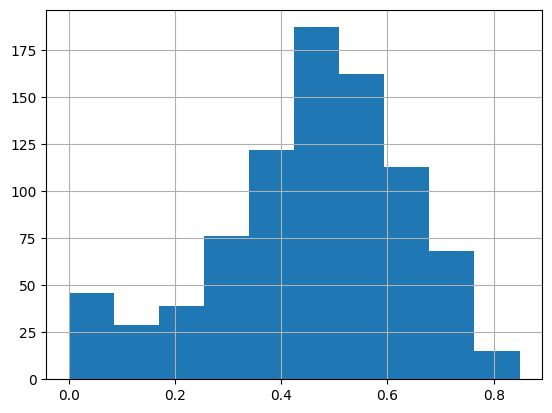

In [9]:
analyze_df['person panoptic-titan iou'].hist()

In [13]:
def check_row(row,ii=None):
    clip_no,_,position_ranking_no = row['Input.image_address_standardized'].split('/')
    position_ranking_no = position_ranking_no.split('.')[0]
    titan_person_id = row['Titan Person ID']
    panoptic_person_id = row['person_panoptic_id']
    iou = row['person panoptic-titan iou']
    panoptic_person_category = row['person_panoptic_category']
    # print(clip_no,position_ranking_no,titan_person_id)
    with open('clip_number_to_batch.pkl', 'rb') as f:
        data_dict = pickle.load(f)
    batch_no = data_dict[clip_no][position_ranking_no][0]
    
    img = cv2.imread(f'/Volumes/Untitled/titan_data/dataset/images_anonymized/{clip_no}/images/{position_ranking_no}.png')

    image_mask = np.load(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_updated.npy')
    mask = image_mask == (ii if ii else panoptic_person_id)

    df = pd.read_csv(f'/Volumes/Untitled/titan_data/dataset/titan_0_4/{clip_no}.csv')
    temp = df.loc[(df['frames']==f'{position_ranking_no}.png') & (df['label']=='person') & (df['obj_track_id']==titan_person_id)]
    t = int(temp['top'].iloc[0])
    l = int(temp['left'].iloc[0])
    h = int(temp['height'].iloc[0])
    w = int(temp['width'].iloc[0])
    rect_mask = np.zeros_like(img)
    rect_mask[t:t+h,l:l+w] = 1
    fig, ax = plt.subplots(1) 
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    rect = patches.Rectangle(xy=(l,t),height=h,width=w,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    ax.imshow(mask,alpha=0.5,cmap='plasma')
    plt.show()
    
    print(clip_no,position_ranking_no,panoptic_person_id,titan_person_id)
    print(iou,panoptic_person_category)
    return batch_no,clip_no,position_ranking_no,titan_person_id,panoptic_person_id,iou,panoptic_person_category

In [90]:
analyze_df[analyze_df['person panoptic-titan iou']<0.6].shape

(671, 16)

In [91]:
gen = analyze_df[analyze_df['person panoptic-titan iou']<0.6].iterrows()

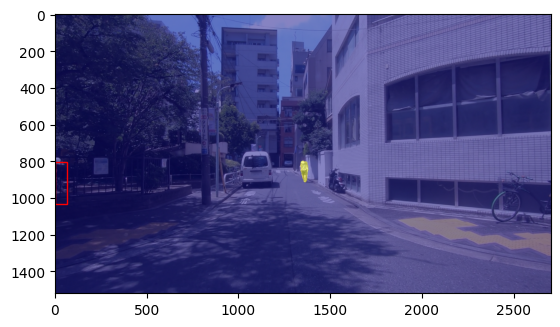

clip_520 000282 2 6
0.0 Person


In [120]:
index,row = next(gen) 
batch_no,clip_no,position_ranking_no,titan_person_id,panoptic_person_id,iou,panoptic_person_category = check_row(row)

In [121]:
with open(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_segments_updated.json', 'r') as f:
    segments_info = json.load(f)
image_mask = np.load(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_updated.npy')


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Untitled/scene_graph_batch-2/panoptic_scene_graph_batch_2/clip_520/000282_panoptic_segments_updated.json'

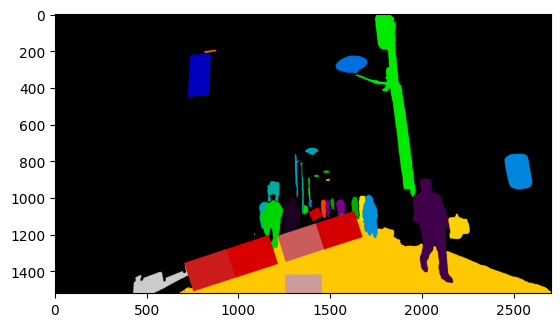

In [71]:
plt.imshow(image_mask,cmap='nipy_spectral')

In [114]:
import shutil
shutil.copy2(f'/Volumes/Untitled/titan_data/dataset/images_anonymized/{clip_no}/images/{position_ranking_no}.png',f'temp_for_prompting/{clip_no}_{position_ranking_no}.png')
shutil.copy2(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_updated.npy',f'temp_for_prompting/{clip_no}_{position_ranking_no}_panoptic_updated.npy')
shutil.copy2(f'/Volumes/Untitled/titan_data/dataset/titan_0_4/{clip_no}.csv',f'temp_for_prompting/titan_{clip_no}.csv')
shutil.copy2(f'/Volumes/Untitled/scene_graph_batch-{batch_no}/panoptic_scene_graph_batch_{batch_no}/{clip_no}/{position_ranking_no}_panoptic_segments_updated.json',f'temp_for_prompting/{clip_no}_{position_ranking_no}_panoptic_segments_updated.json')

'temp_for_prompting/clip_62_000594_panoptic_segments_updated.json'

In [501]:
id_list = [a['id'] for a in segments_info]

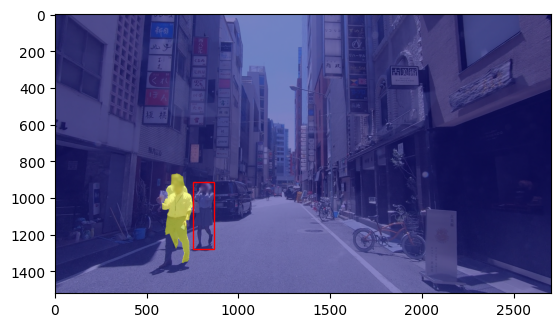

clip_238 000594 1 13
0.0 Person


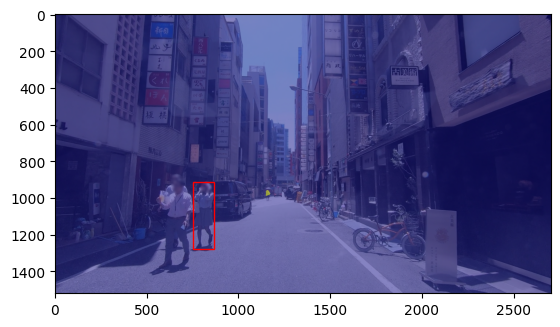

clip_238 000594 1 13
0.0 Person


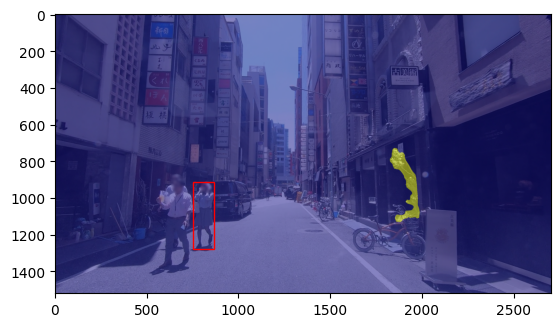

clip_238 000594 1 13
0.0 Person


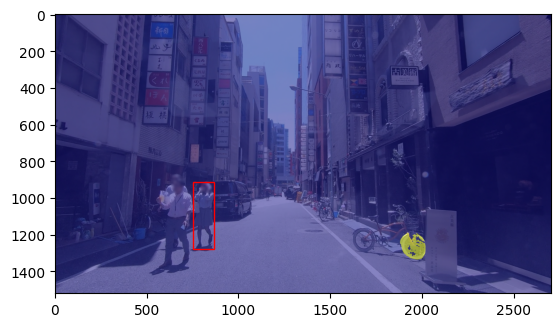

clip_238 000594 1 13
0.0 Person


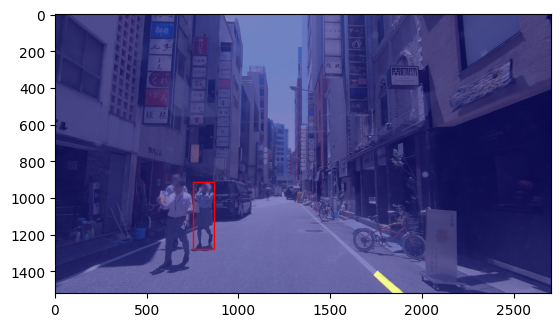

clip_238 000594 1 13
0.0 Person


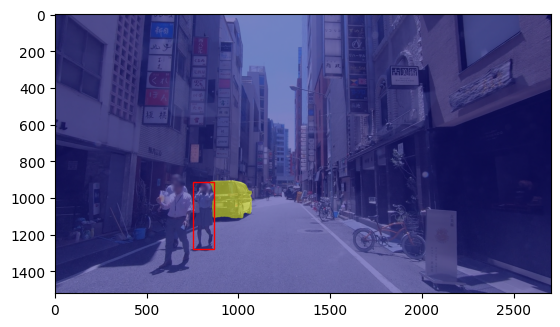

clip_238 000594 1 13
0.0 Person


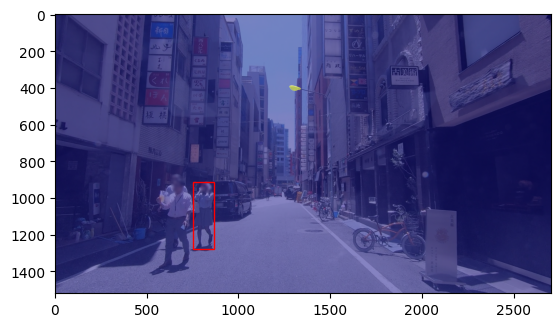

clip_238 000594 1 13
0.0 Person


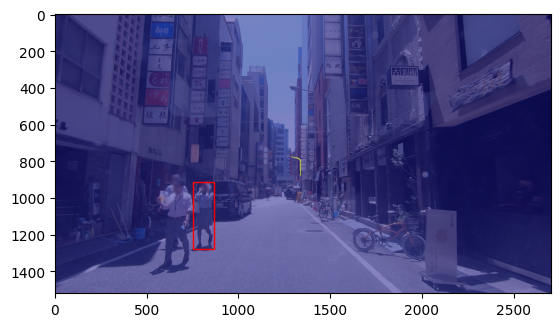

clip_238 000594 1 13
0.0 Person


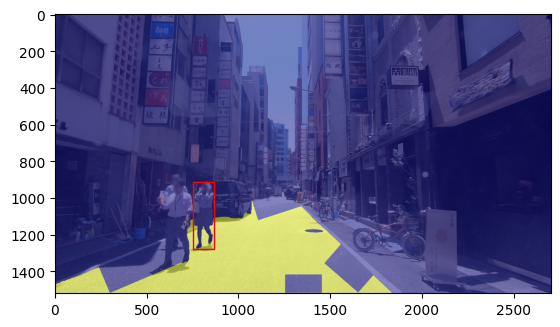

clip_238 000594 1 13
0.0 Person


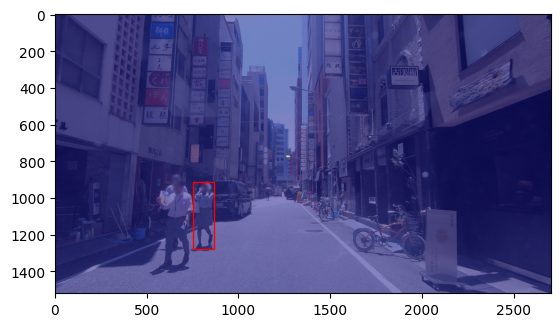

clip_238 000594 1 13
0.0 Person


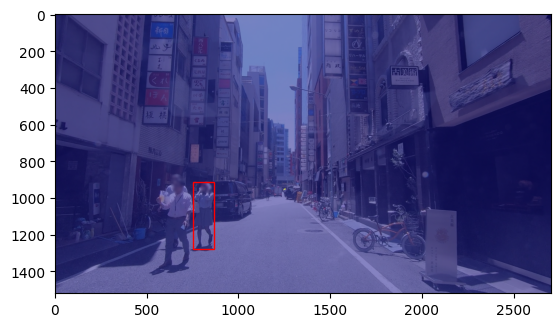

clip_238 000594 1 13
0.0 Person


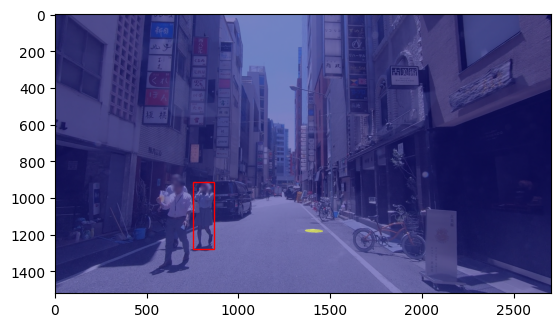

clip_238 000594 1 13
0.0 Person


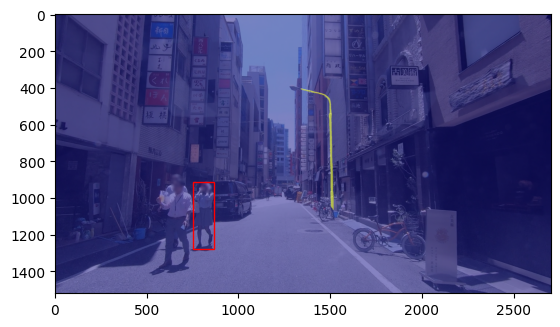

clip_238 000594 1 13
0.0 Person


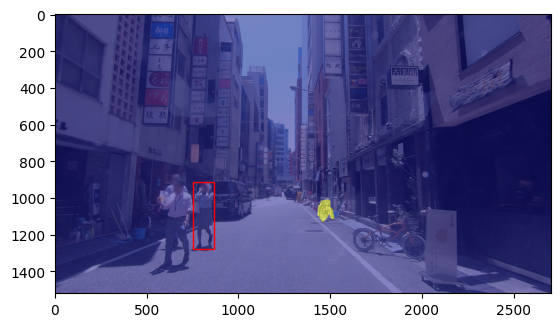

clip_238 000594 1 13
0.0 Person


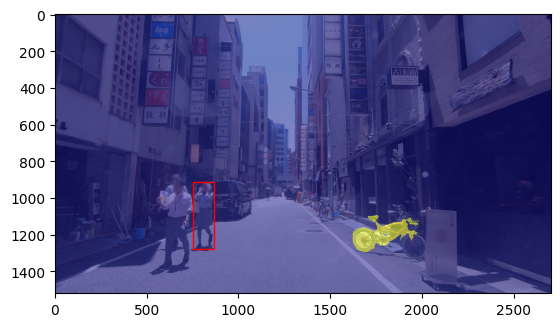

clip_238 000594 1 13
0.0 Person


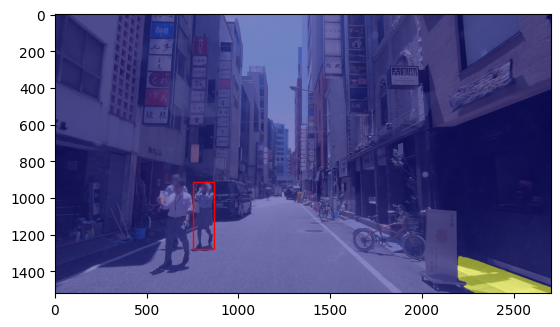

clip_238 000594 1 13
0.0 Person


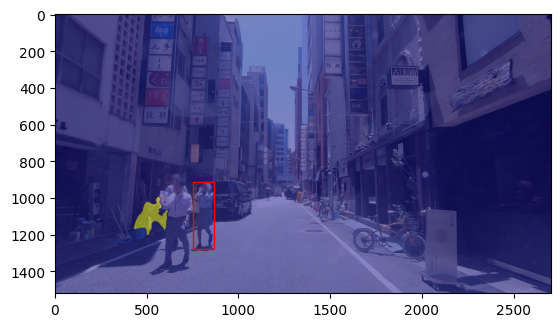

clip_238 000594 1 13
0.0 Person


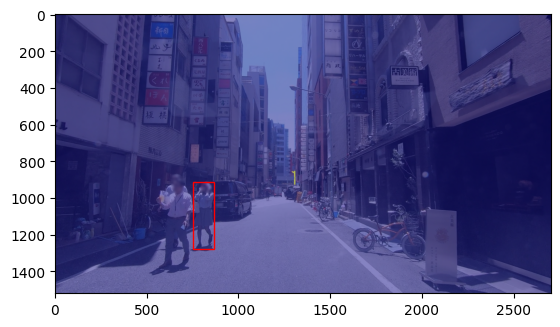

clip_238 000594 1 13
0.0 Person


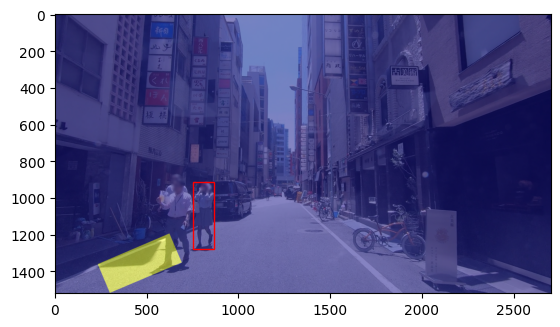

clip_238 000594 1 13
0.0 Person


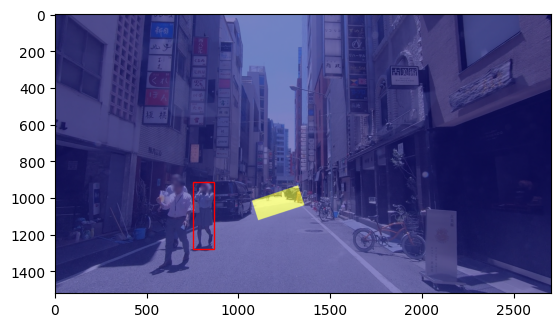

clip_238 000594 1 13
0.0 Person


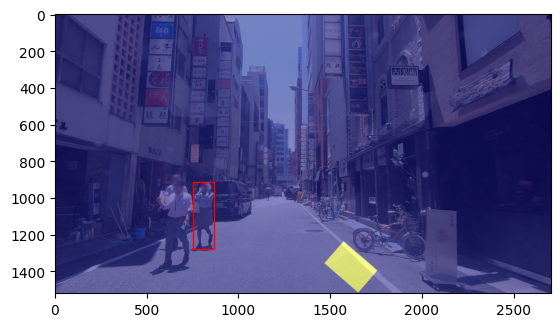

clip_238 000594 1 13
0.0 Person


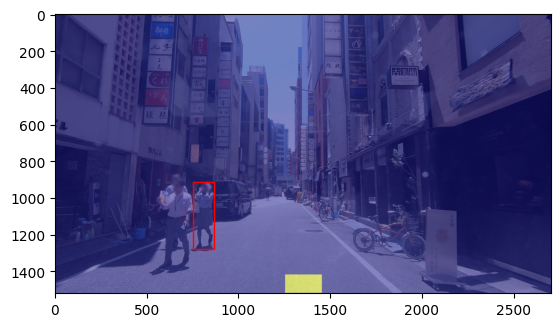

clip_238 000594 1 13
0.0 Person


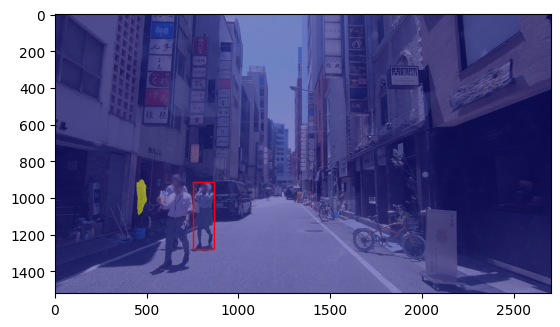

clip_238 000594 1 13
0.0 Person


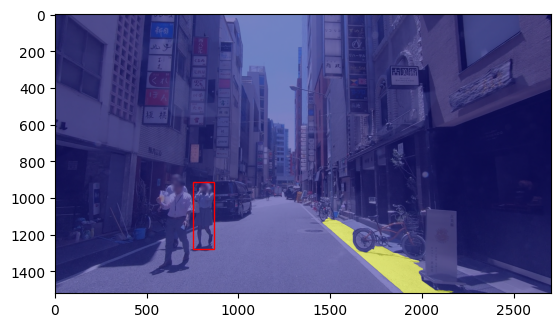

clip_238 000594 1 13
0.0 Person


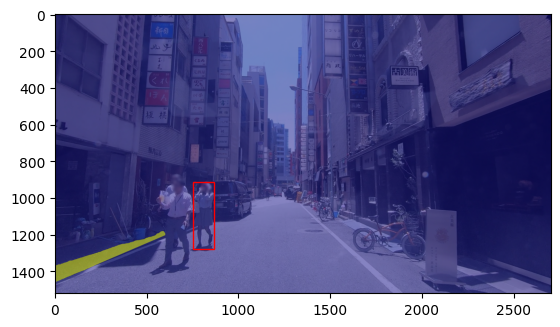

clip_238 000594 1 13
0.0 Person


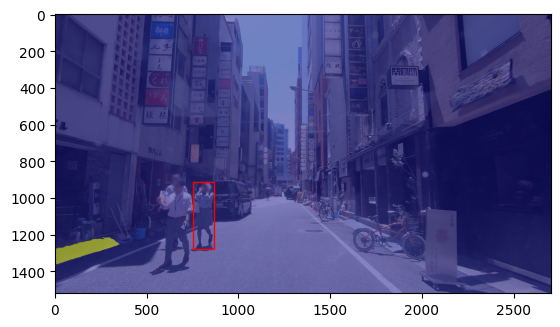

clip_238 000594 1 13
0.0 Person


In [502]:
for ii in id_list:
    check_row(row,ii)

In [301]:
for a in segments_info:
    if a['category_id'] == 19 : print(a)

{'id': 1, 'isthing': True, 'category_id': 19}
{'id': 2, 'isthing': True, 'category_id': 19}
{'id': 3, 'isthing': True, 'category_id': 19}
{'id': 4, 'isthing': True, 'category_id': 19}
{'id': 9, 'isthing': True, 'category_id': 19}
{'id': 17, 'isthing': True, 'category_id': 19}
{'id': 21, 'isthing': True, 'category_id': 19}
{'id': 24, 'isthing': True, 'category_id': 19}
{'id': 29, 'isthing': True, 'category_id': 19}
{'id': 32, 'isthing': True, 'category_id': 19}
{'id': 33, 'isthing': True, 'category_id': 19}
{'id': 35, 'isthing': True, 'category_id': 19}
{'id': 36, 'isthing': True, 'category_id': 19}
